In [1]:
import os
import re
import pickle
from pathlib import Path
import yaml

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import scipy
import pandas as pd
import torch
import tifffile
from sklearn.metrics import adjusted_rand_score
from einops import rearrange

In [2]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

In [3]:
%load_ext autoreload

In [4]:
%autoreload 2

In [5]:
import mushroom.utils as utils
import mushroom.visualization.utils as vis_utils
import mushroom.data.datasets as datasets
import mushroom.data.visium as visium
import mushroom.data.xenium as xenium
import mushroom.data.multiplex as multiplex
import mushroom.data.he as he
from mushroom.mushroom import Mushroom

In [6]:
project_dir = '/data/estorrs/mushroom/data/projects/submission_v1'
case = 'HT413C1-Th1k4A1'
output_dir = os.path.join(project_dir, 'analysis', case)
Path(output_dir).mkdir(parents=True, exist_ok=True)

In [7]:
output_dir

'/data/estorrs/mushroom/data/projects/submission_v1/analysis/HT413C1-Th1k4A1'

In [8]:
outputs = pickle.load(open(os.path.join(project_dir, case, 'mushroom_50res', 'outputs.pkl'), 'rb'))
outputs.keys()

dict_keys(['section_positions', 'section_ids', 'dtype_to_volume', 'dtype_to_volume_probs', 'dtype_to_clusters', 'dtype_to_cluster_probs', 'dtype_to_cluster_probs_all', 'dtype_to_cluster_intensities'])

In [9]:
outputs['dtype_to_clusters'].keys()

dict_keys(['integrated', 'cosmx', 'he', 'multiplex', 'xenium'])

In [10]:
mushroom = Mushroom.from_config(os.path.join(project_dir, case, 'mushroom_50res'), accelerator='cpu')

INFO:root:loading spore for cosmx
INFO:root:data mask detected
INFO:root:starting cosmx processing
INFO:root:using 1000 channels
INFO:root:2 sections detected: ['HT413C1-Th1k4A1-U7', 'HT413C1-Th1k4A1-U34']
INFO:root:processing sections
INFO:root:generating image data for section HT413C1-Th1k4A1-U7
INFO:root:generating image data for section HT413C1-Th1k4A1-U34
INFO:root:generating training dataset
INFO:root:generating inference dataset
INFO:root:total of 2 sections detected: [('HT413C1-Th1k4A1-U7', 'cosmx'), ('HT413C1-Th1k4A1-U34', 'cosmx')]
INFO:root:creating data loaders
INFO:torch.distributed.nn.jit.instantiator:Created a temporary directory at /tmp/tmpdt4xmj1f
INFO:torch.distributed.nn.jit.instantiator:Writing /tmp/tmpdt4xmj1f/_remote_module_non_scriptable.py
INFO:root:creating ViT


cosmx torch.Size([1000, 102, 73])


INFO:root:model initialized
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/data/estorrs/miniconda3/envs/mushroom/lib/python3.10/site-packages/lightning/pytorch/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
INFO:root:loading checkpoint: /data/estorrs/mushroom/data/projects/submission_v1/HT413C1-Th1k4A1/mushroom_50res/cosmx_chkpts/last.ckpt
INFO:root:loading spore for he
INFO:root:data mask detected
INFO:root:starting he processing
INFO:root:14 sections detected: ['HT413C1-Th1k4A1-U14', 'HT413C1-Th1k4A1-U18', 'HT413C1-Th1k4A1-U1', 'HT413C1-Th1k4A1-U4', 'HT413C1-Th1k4A1-U8', 'HT413C1-Th1k4A1-U11', 'HT413C1-Th1k4A1-U21', 'HT413C1-Th1k4A1-U24', 'HT413C1-Th1k4A1-U27', 'HT413C1-Th1k4A1-U29', 'HT413C1-Th1k4A1-U30', 'HT413C1-Th1k4A1-U35', 'HT413C1-Th1k4A1-U38', 'HT413C1-Th1k4A1-U40']
INFO:root:processing sections
INFO:root:generatin

0.02


INFO:root:generating image data for section HT413C1-Th1k4A1-U18
INFO:root:generating image data for section HT413C1-Th1k4A1-U1
INFO:root:generating image data for section HT413C1-Th1k4A1-U4
INFO:root:generating image data for section HT413C1-Th1k4A1-U8
INFO:root:generating image data for section HT413C1-Th1k4A1-U11
INFO:root:generating image data for section HT413C1-Th1k4A1-U21
INFO:root:generating image data for section HT413C1-Th1k4A1-U24
INFO:root:generating image data for section HT413C1-Th1k4A1-U27
INFO:root:generating image data for section HT413C1-Th1k4A1-U29
INFO:root:generating image data for section HT413C1-Th1k4A1-U30
INFO:root:generating image data for section HT413C1-Th1k4A1-U35
INFO:root:generating image data for section HT413C1-Th1k4A1-U38
INFO:root:generating image data for section HT413C1-Th1k4A1-U40
INFO:root:generating training dataset
INFO:root:generating inference dataset
INFO:root:total of 14 sections detected: [('HT413C1-Th1k4A1-U14', 'he'), ('HT413C1-Th1k4A1-U18

he torch.Size([3, 101, 72])


INFO:root:loading spore for multiplex
INFO:root:data mask detected
INFO:root:starting multiplex processing
INFO:root:using 27 channels
INFO:root:7 sections detected: ['HT413C1-Th1k4A1-U20', 'HT413C1-Th1k4A1-U3', 'HT413C1-Th1k4A1-U26', 'HT413C1-Th1k4A1-U32', 'HT413C1-Th1k4A1-U37', 'HT413C1-Th1k4A1-U41', 'HT413C1-Th1k4A1-U42']
INFO:root:processing sections
INFO:root:generating image data for section HT413C1-Th1k4A1-U20


0.02


INFO:root:generating image data for section HT413C1-Th1k4A1-U3
INFO:root:generating image data for section HT413C1-Th1k4A1-U26
INFO:root:generating image data for section HT413C1-Th1k4A1-U32
INFO:root:generating image data for section HT413C1-Th1k4A1-U37
INFO:root:generating image data for section HT413C1-Th1k4A1-U41
INFO:root:generating image data for section HT413C1-Th1k4A1-U42
INFO:root:generating training dataset
INFO:root:generating inference dataset
INFO:root:total of 7 sections detected: [('HT413C1-Th1k4A1-U20', 'multiplex'), ('HT413C1-Th1k4A1-U3', 'multiplex'), ('HT413C1-Th1k4A1-U26', 'multiplex'), ('HT413C1-Th1k4A1-U32', 'multiplex'), ('HT413C1-Th1k4A1-U37', 'multiplex'), ('HT413C1-Th1k4A1-U41', 'multiplex'), ('HT413C1-Th1k4A1-U42', 'multiplex')]
INFO:root:creating data loaders
INFO:root:creating ViT
INFO:root:model initialized
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPU

multiplex torch.Size([27, 101, 72])


INFO:root:loading spore for xenium
INFO:root:data mask detected
INFO:root:starting xenium processing
INFO:root:using 477 channels
INFO:root:6 sections detected: ['HT413C1-Th1k4A1-U19', 'HT413C1-Th1k4A1-U2', 'HT413C1-Th1k4A1-U9', 'HT413C1-Th1k4A1-U25', 'HT413C1-Th1k4A1-U31', 'HT413C1-Th1k4A1-U36']
INFO:root:processing sections
INFO:root:generating image data for section HT413C1-Th1k4A1-U19
INFO:root:generating image data for section HT413C1-Th1k4A1-U2
INFO:root:generating image data for section HT413C1-Th1k4A1-U9
INFO:root:generating image data for section HT413C1-Th1k4A1-U25
INFO:root:generating image data for section HT413C1-Th1k4A1-U31
INFO:root:generating image data for section HT413C1-Th1k4A1-U36
INFO:root:generating training dataset
INFO:root:generating inference dataset
INFO:root:total of 6 sections detected: [('HT413C1-Th1k4A1-U19', 'xenium'), ('HT413C1-Th1k4A1-U2', 'xenium'), ('HT413C1-Th1k4A1-U9', 'xenium'), ('HT413C1-Th1k4A1-U25', 'xenium'), ('HT413C1-Th1k4A1-U31', 'xenium'),

xenium torch.Size([477, 102, 73])


INFO:root:model initialized
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/data/estorrs/miniconda3/envs/mushroom/lib/python3.10/site-packages/lightning/pytorch/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
INFO:root:loading checkpoint: /data/estorrs/mushroom/data/projects/submission_v1/HT413C1-Th1k4A1/mushroom_50res/xenium_chkpts/last.ckpt
INFO:root:chkpt files detected, embedding to spores
INFO:root:embedding cosmx spore
/data/estorrs/miniconda3/envs/mushroom/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=63` in the `DataLoader` to improve performance.


Predicting: |                                                                                       | 0/? [00:…

INFO:root:embedding he spore


Predicting: |                                                                                       | 0/? [00:…

INFO:root:embedding multiplex spore


Predicting: |                                                                                       | 0/? [00:…

INFO:root:embedding xenium spore


Predicting: |                                                                                       | 0/? [00:…

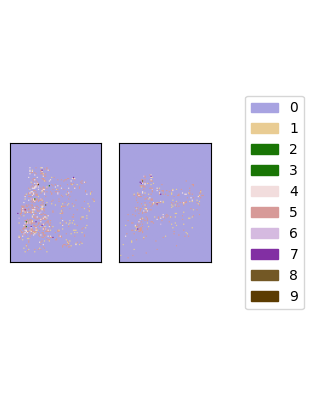

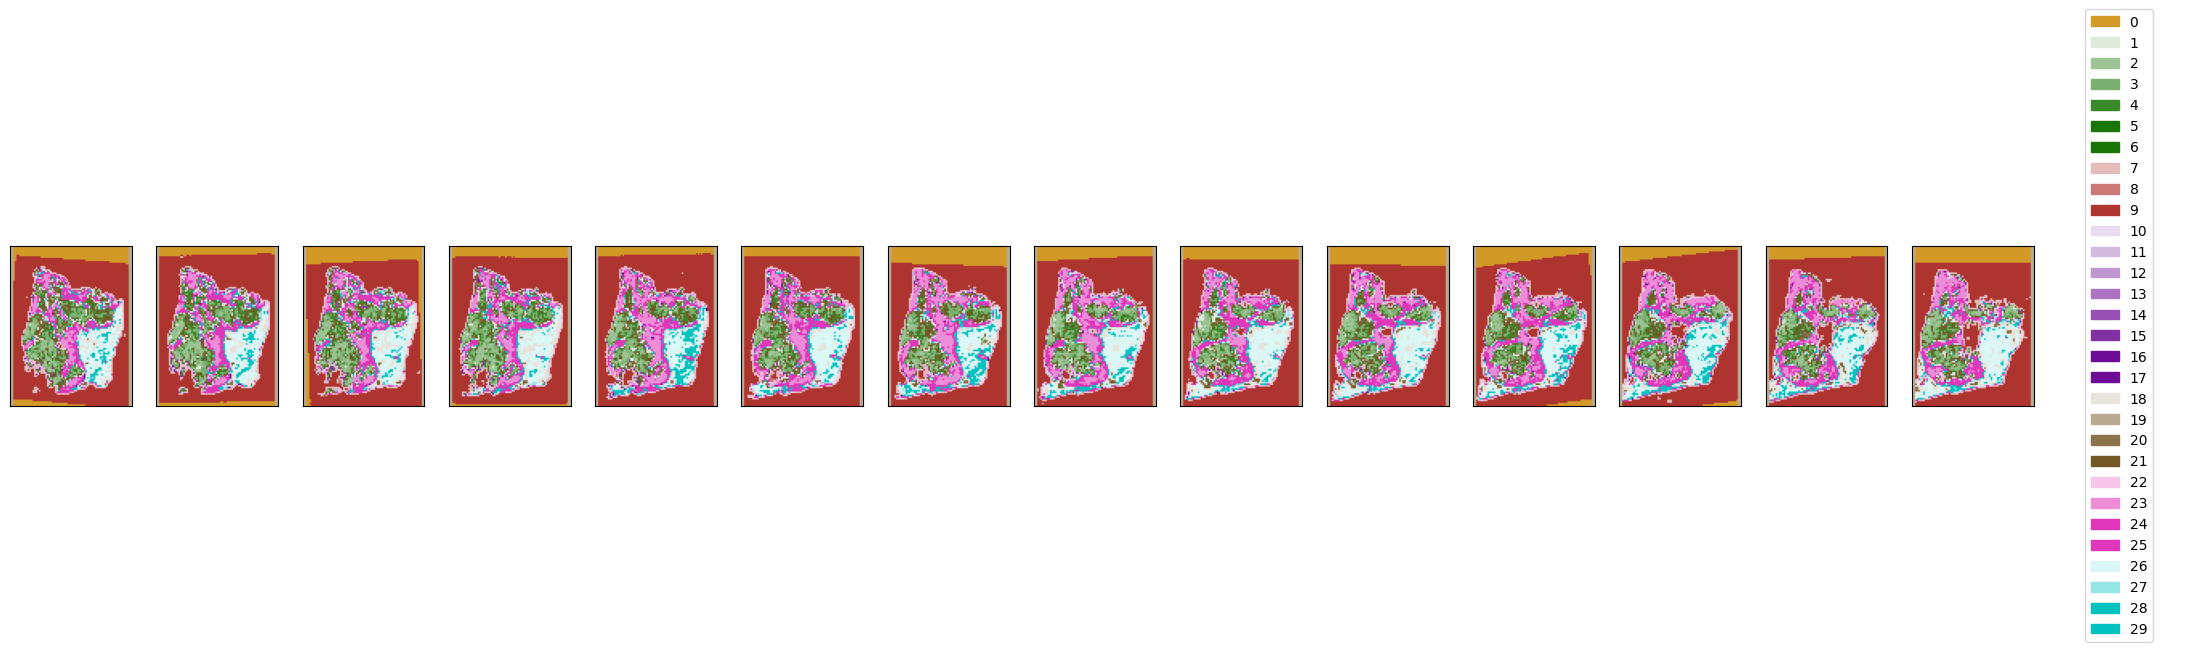

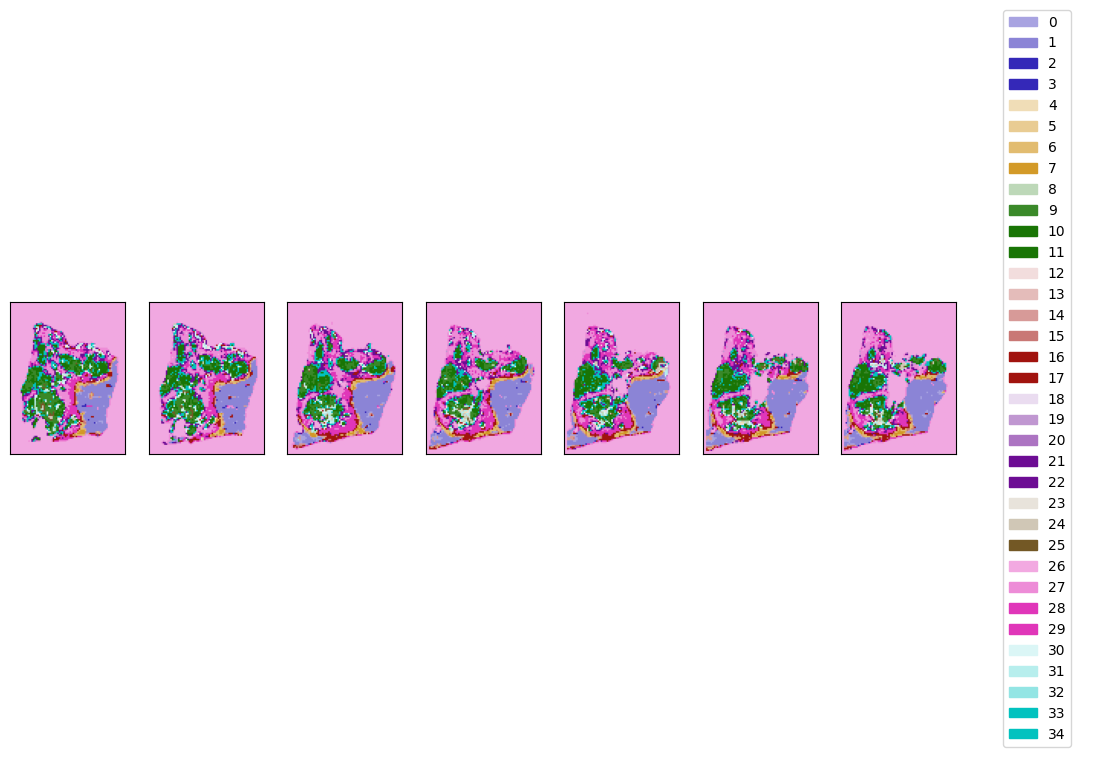

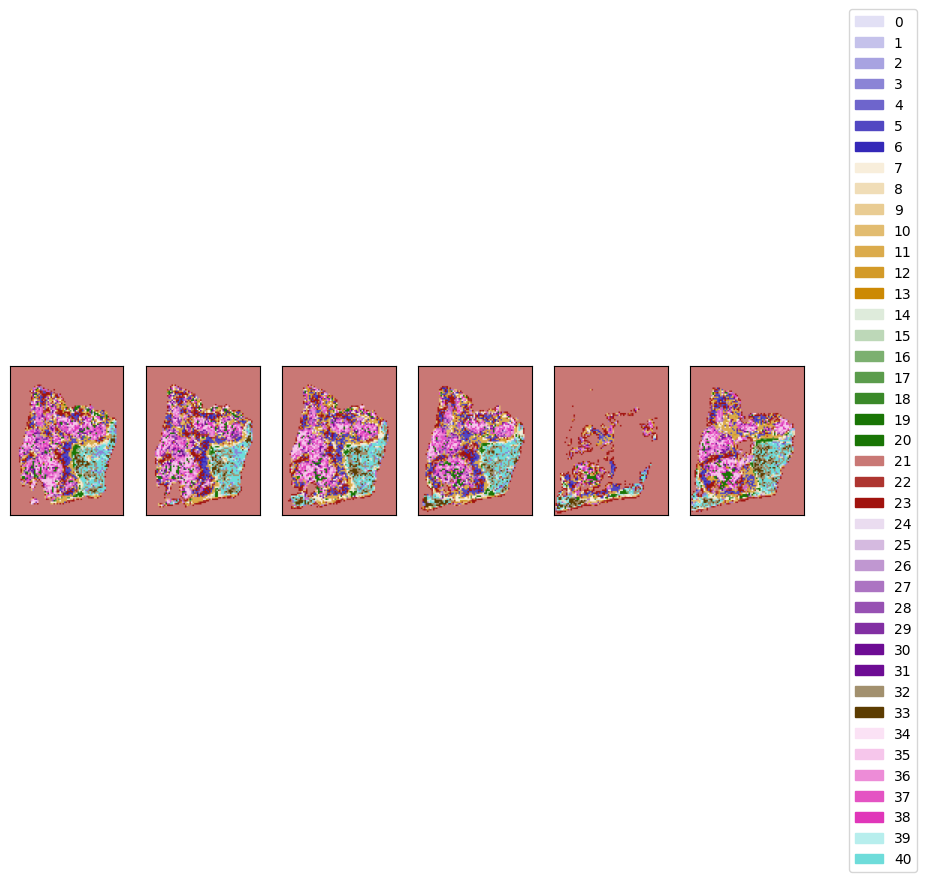

In [11]:
for dtype in mushroom.dtypes:
    mushroom.display_clusters(dtype)
    plt.show()

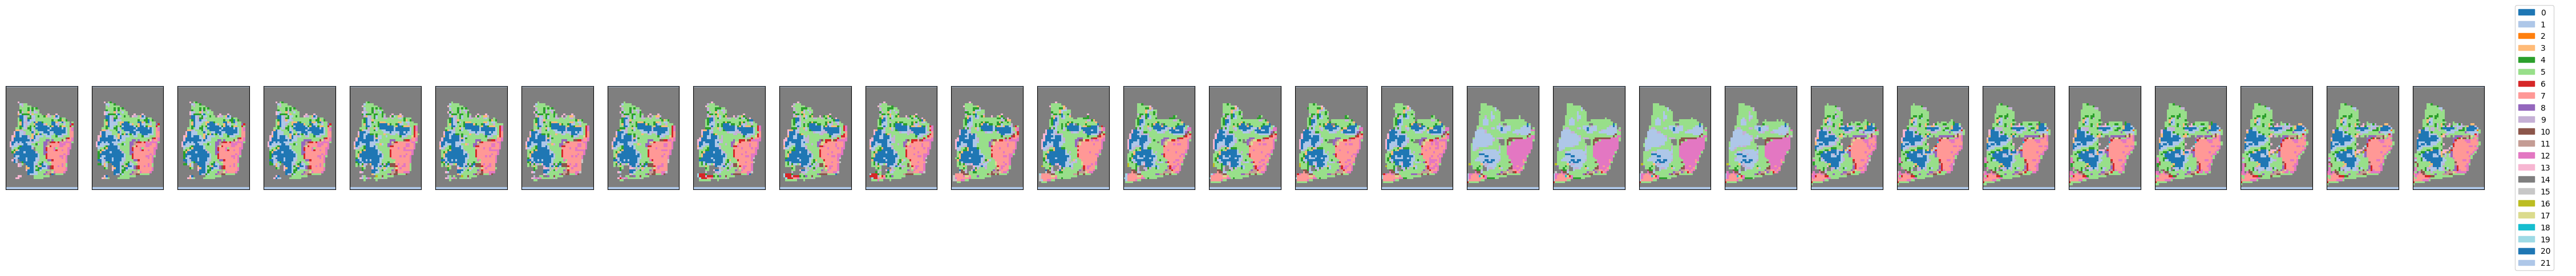

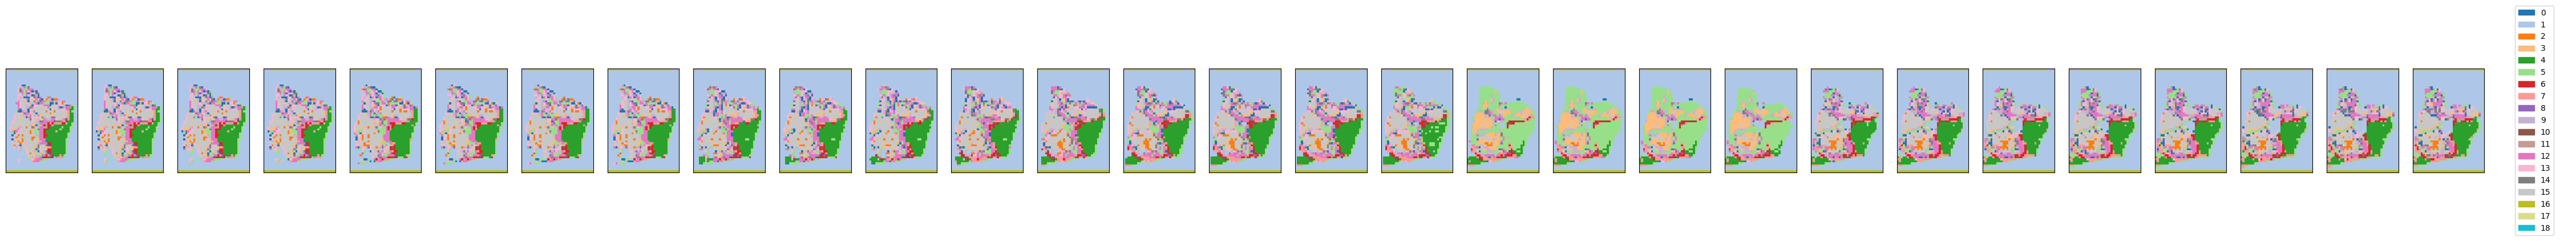

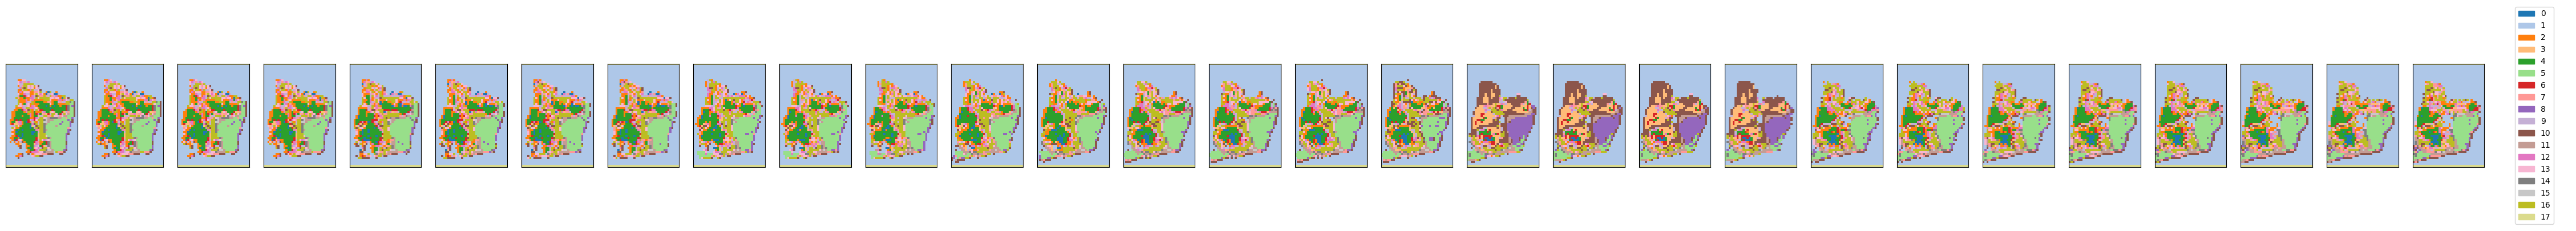

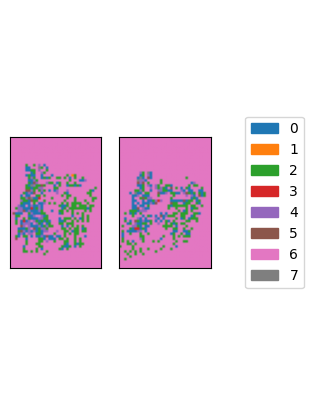

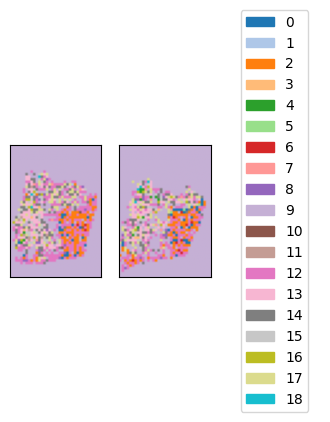

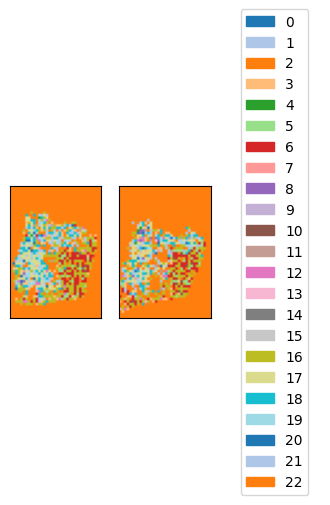

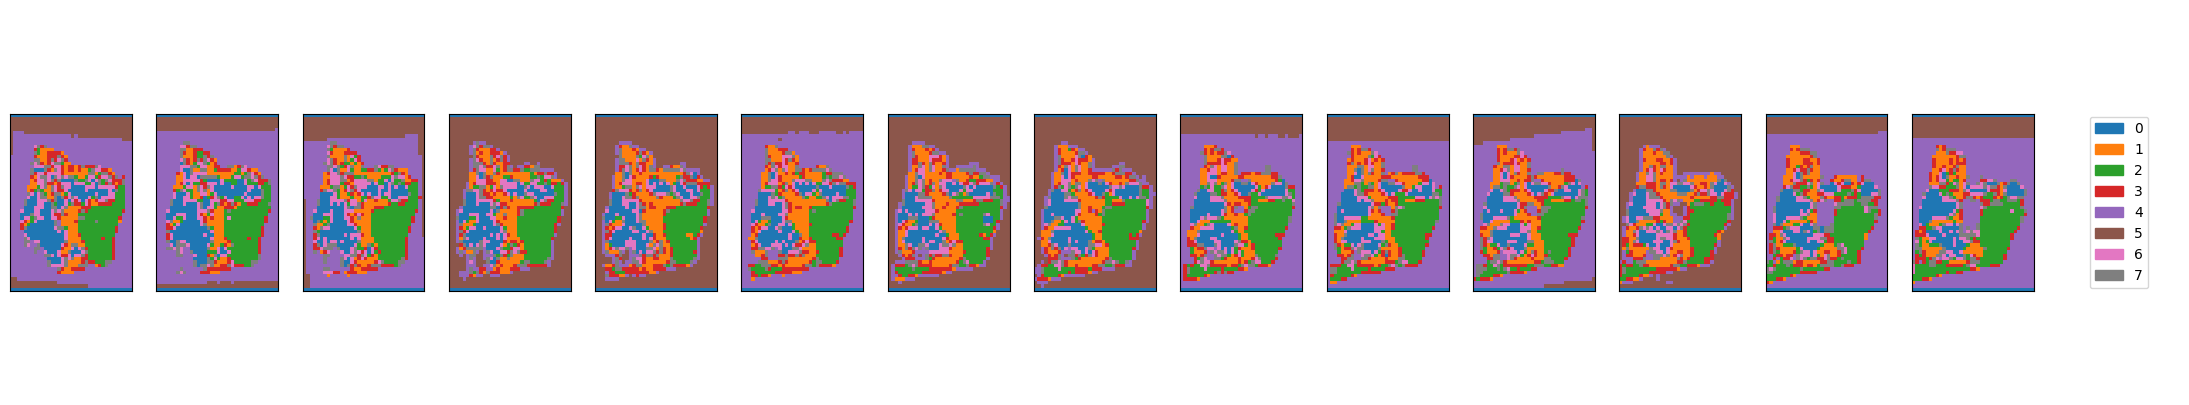

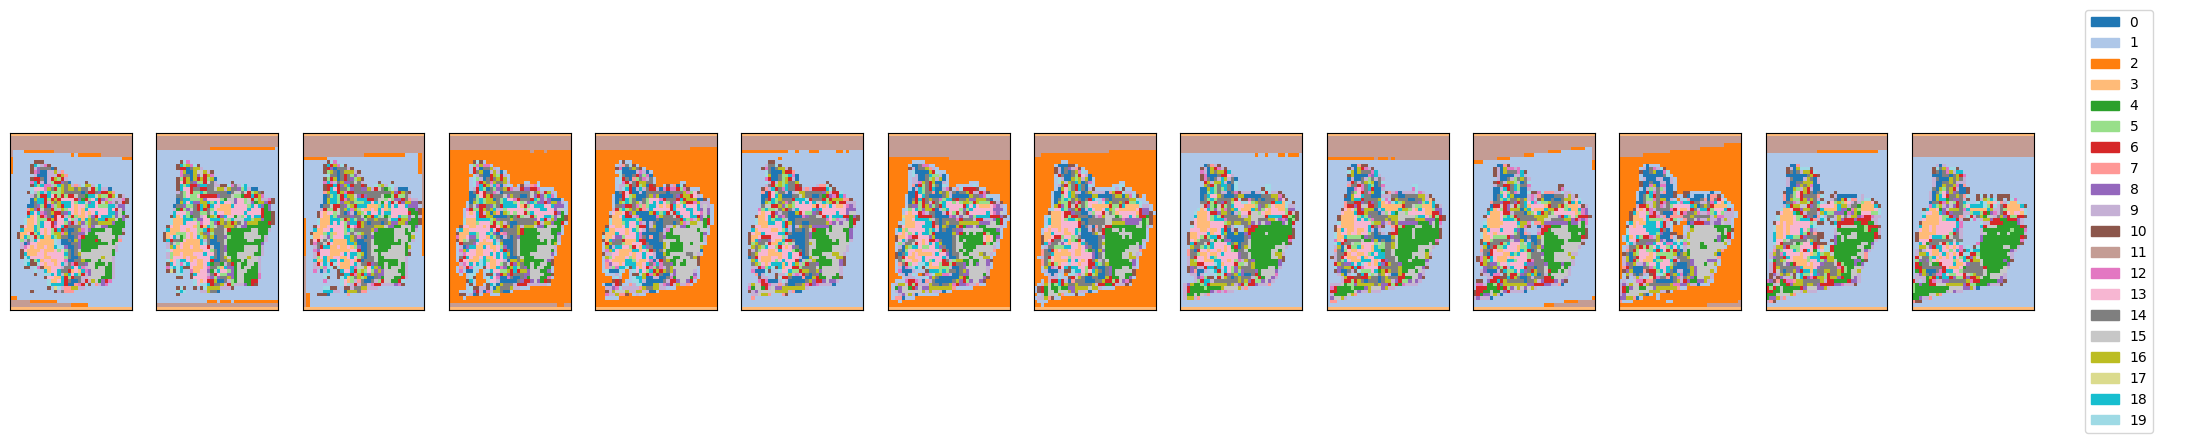

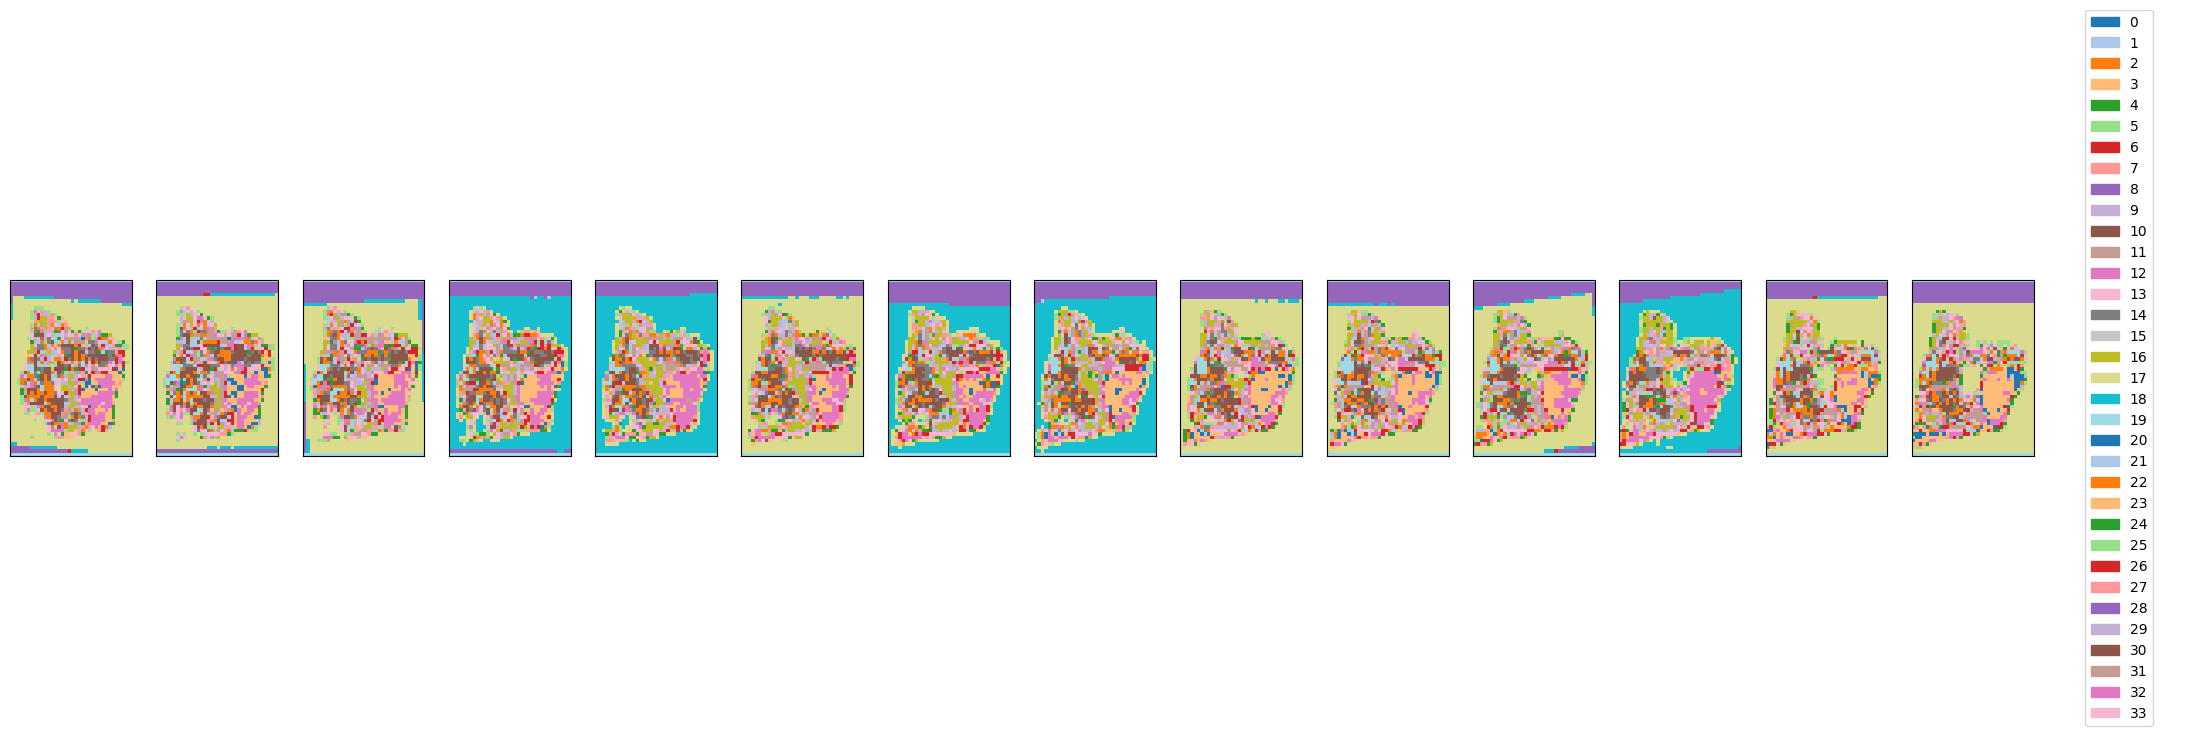

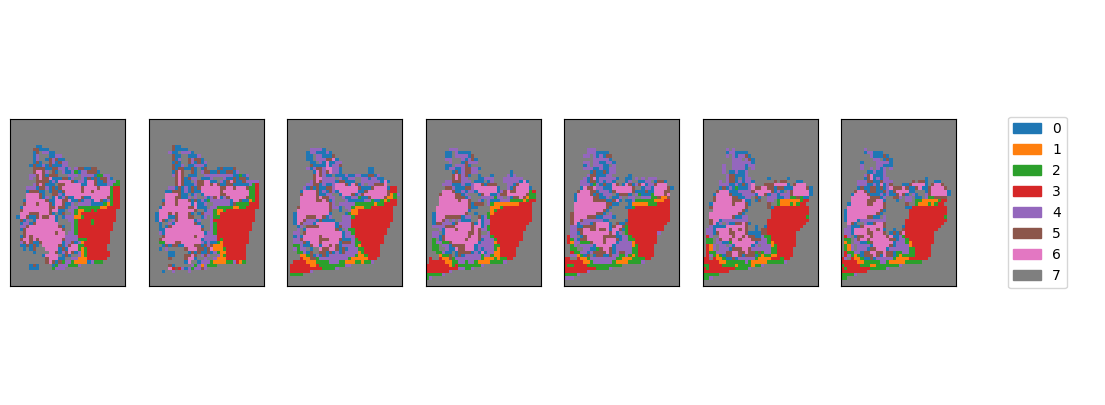

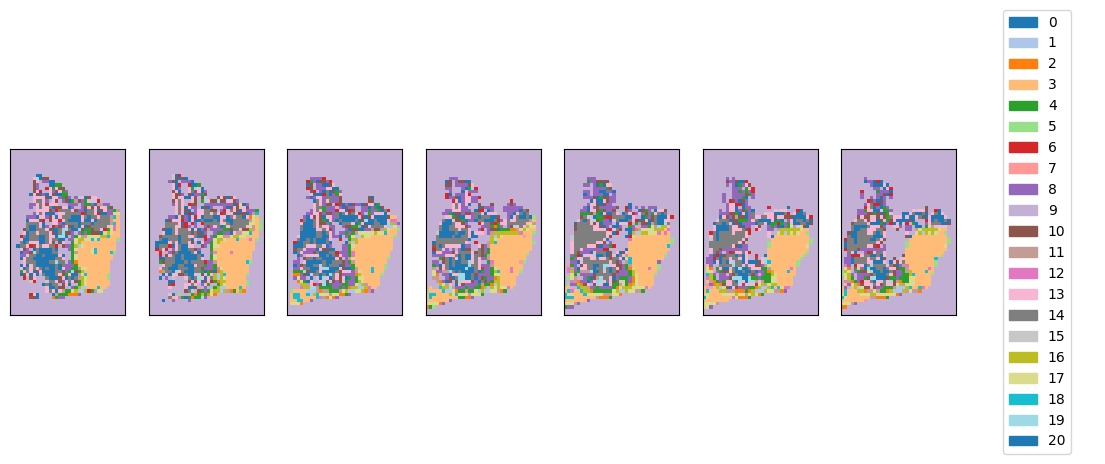

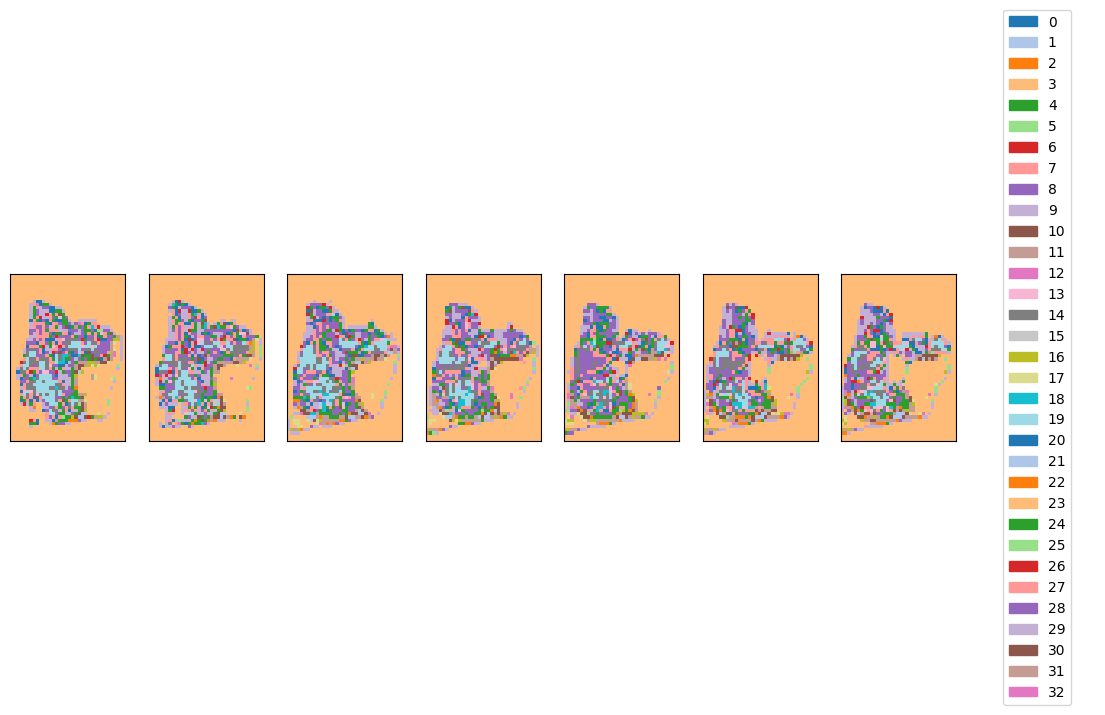

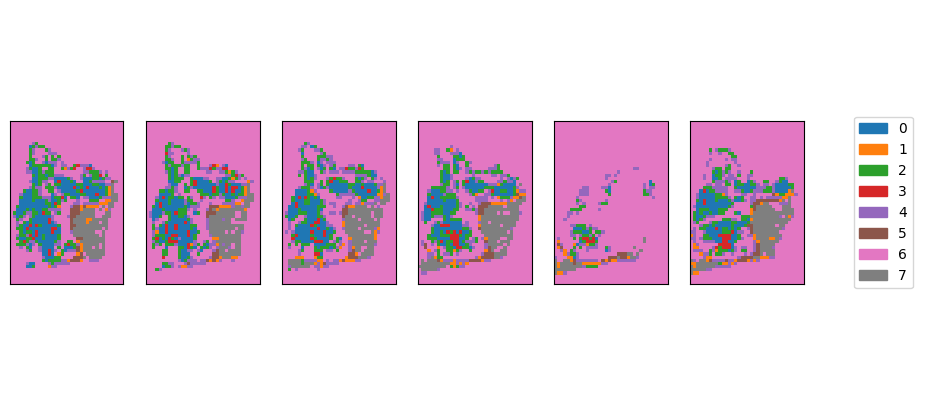

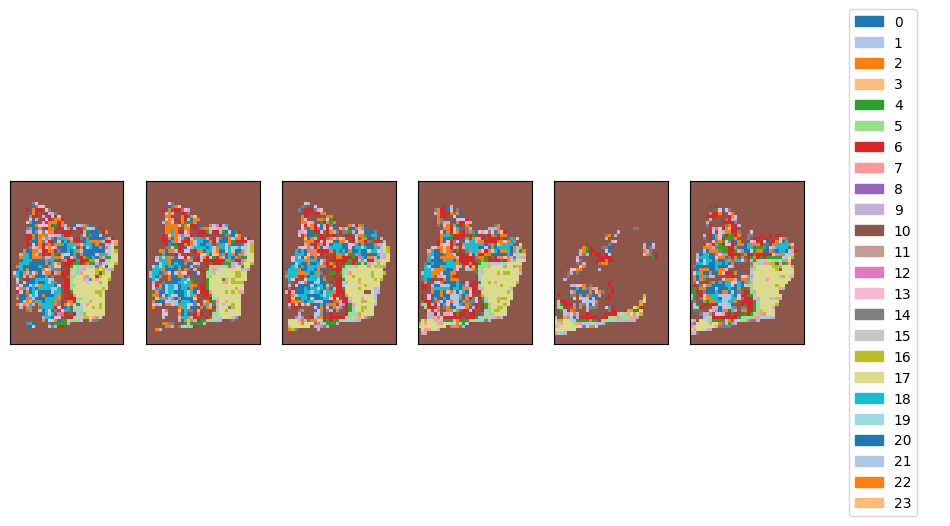

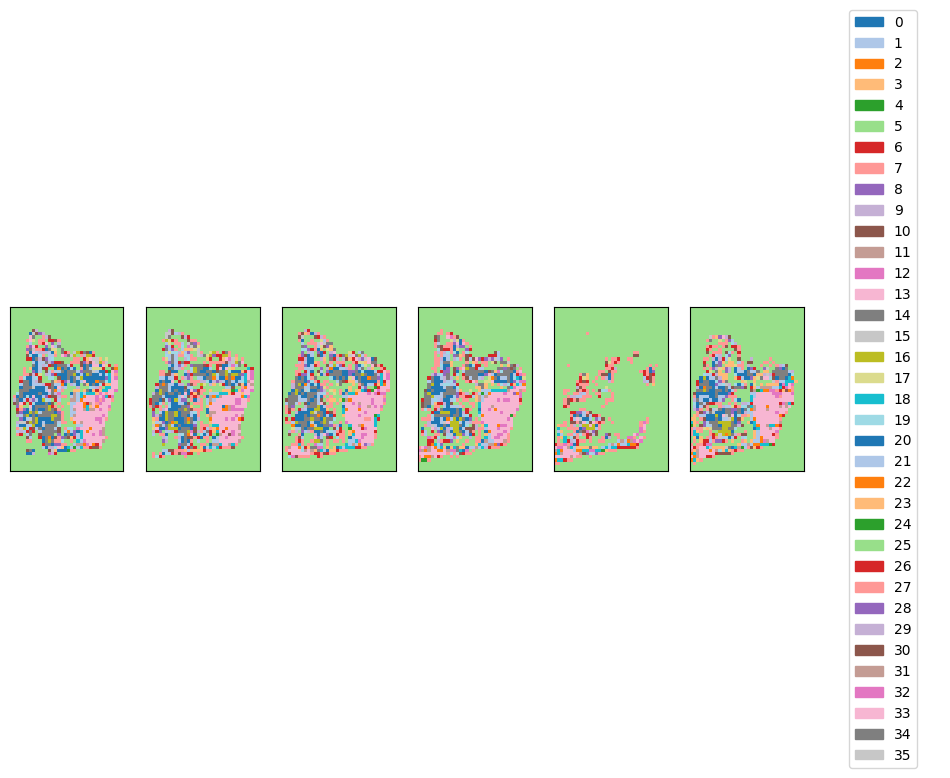

In [14]:
for k, v in outputs['dtype_to_clusters'].items():
    for level, clusters in enumerate(v):
        vis_utils.display_clusters(clusters, preserve_indices=True)
        plt.show()

In [ ]:
# mushroom_dir = os.path.join(project_dir, )

In [46]:
agg_clusters = mushroom.dtype_to_spore['multiplex'].agg_clusters[:1]
[(x.shape, x.max()) for x in agg_clusters]

[((7, 100, 76), 7)]

In [47]:
aggs = np.stack(agg_clusters)
aggs = rearrange(aggs, 'z n h w -> (n h w) z')
aggs = np.unique(aggs, axis=0)
agg_to_label = {tuple(agg):i for i, agg in enumerate(aggs)}
label_to_agg = {v:k for k, v in agg_to_label.items()}

def assign_labels(*args):
    return agg_to_label[tuple(args)]

relabeled = np.vectorize(assign_labels)(*agg_clusters)
relabeled.shape

(7, 100, 76)

In [48]:
label_to_agg

{0: (0,), 1: (1,), 2: (2,), 3: (3,), 4: (4,), 5: (5,), 6: (6,), 7: (7,)}

In [ ]:
# if aggs.shape[0] == 1:
#     smooshed = aggs[0]
# if aggs.shape[0] == 2:
#     n_slots = n_clusters.shape[1]
#     arr = np.arange(n_slots)
    
#     def assign_label(*args):
#         if len(args) == 1:
#             return args[0]
#         elif len(args) == 2:
#             start = args[0] * n_clusters[0]
#             val = start + args[1]

In [ ]:
n_colors = n_clusts[1]
            val = (agg[-1] + 1) / n_colors
            label_to_color[label] = LinearSegmentedColormap.from_list('a', ['white', color_endpoints[agg[0]]], N=n_colors)(val)

In [ ]:
def smoosh(*args):
    new = 0
    for i, val in enumerate(args):
        new += val * 10**i
    return new

def relabel(labels):
    new = torch.zeros_like(labels, dtype=labels.dtype)
    ids = labels.unique()
    for i in range(len(ids)):
        new[labels==ids[i]] = i
        
    return new

def label_agg_clusters(clusters):
    smooshed = np.vectorize(smoosh)(*clusters)